In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
import time
import cv2

In [5]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
X_train.shape[0]
print(X_train.shape[0])
print(X_train.shape[1:])
print(y_train.shape[0])

60000
(28, 28)
60000


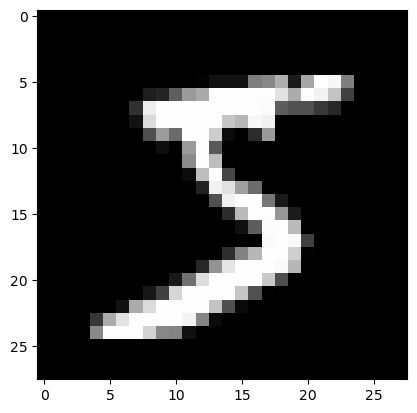

In [9]:
plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))

In [11]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [13]:
X_train = X_train/255
X_test = X_test/255

In [15]:
len(X_train[0])

784

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from keras import utils as npo_utils

y_train = npo_utils.to_categorical(y_train)
y_test = npo_utils.to_categorical(y_test)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
num_classes = y_test.shape[1]
num_pixels = 784
print(num_classes)

10


In [25]:
def  baseline_model_1():
  model = Sequential()
  model.add(Dense(512, input_dim = num_pixels, activation = "relu"))
  model.add(Dropout(0.2))
  # model.add(Dense(256, activation = "relu"))
  # model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation = "softmax"))

  return model

In [27]:
def  baseline_model_2():
  model = Sequential()
  model.add(Dense(512, input_dim = num_pixels, activation = "tanh"))
  model.add(Dropout(0.2))
  # model.add(Dense(256, activation = "tanh"))
  # model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation = "softmax"))

  return model

In [ ]:
model_1 = baseline_model_1()
model_2 = baseline_model_2()
# model.summary()

In [ ]:
opt = Adam(learning_rate = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [ ]:
# Load and preprocess the custom image for prediction
def preprocess_custom_image(image_path):
    # Read and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (28, 28))  # Resize to 28x28
    image = cv2.bitwise_not(image)  # Invert colors if the background is black and digit is white
    image = image.astype("float32") / 255  # Normalize pixel values
    image = image.reshape((1, -1))  # Flatten and reshape for model input
    return image

In [ ]:
start_time = time.time()

model_1.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose = 1)
score = model.evaluate(X_test,y_test, verbose =1)


for i in range(10**6):
    _ = i**2
end_time = time.time()
runtime = end_time - start_time

print("Error: %.2f%%" % (100-score[1]*100))
print("Accuracy: %.2f%%" % (score[1]*100))
print(f"Runtime: {runtime:.6f} seconds")

In [ ]:
start_time = time.time()

model_2.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose = 1)
score = model.evaluate(X_test,y_test, verbose =1)


for i in range(10**6):
    _ = i**2
end_time = time.time()
runtime = end_time - start_time

print("Error: %.2f%%" % (100-score[1]*100))
print("Accuracy: %.2f%%" % (score[1]*100))
print(f"Runtime: {runtime:.6f} seconds")

In [ ]:
# SCENARIO_1
#Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_2
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_3
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_2.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_4
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_2.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_5
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_3.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_6
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_3.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_7
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_4.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_8
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_4.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_9
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_5.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_10
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_5.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_11
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_6.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_12
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_6.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_13
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_7.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_14
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_7.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_15
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_8.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_16
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_8.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_17
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_9.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_18
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_9.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_19
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_10.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_20
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_10.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_21
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_11.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_22
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_11.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_23
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_12.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])

In [ ]:
# SCENARIO_24
 #Predict the uploaded image
image_path = "8.jpeg"
processed_image = preprocess_custom_image(image_path)
preds = model_12.predict(processed_image)
predicted_digit = np.argmax(preds, axis=1)

# Display the processed image and prediction result
plt.imshow(processed_image.reshape((28, 28)), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.axis("off")
plt.show()

print("Predicted Probabilities:", preds[0])
print("Predicted Digit:", predicted_digit[0])